# Binary classification : Tabular data

# 1st level. Titanic: Machine Learning from Disaster

- https://kaggle-kr.tistory.com/32
- https://kaggle-kr.tistory.com/17?category=868316
- https://www.kaggle.com/ash316/eda-to-prediction-dietanic
- https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

---

<b>Part1: Exploratory Data Analysis(EDA)</b>
1) Feature analysis (numerical, categorical)</br>
2) Check for null and missing values</br>
3) Outlier detection</br>
4) Finding any relations or trends considering multiple features</br>

<b>Part2: Feature Engineering and Data Cleaning</b>
1) Adding any few features</br>
2) Removing redundant features</br>
3) Converting features into suitable form for modeling (one-hot encoding, 범주화, 텍스트 데이터 처리 등)</br>

<b>Part3: Predictive Modeling</b>
1) Running Basic Algorithms (sklearn, Deep learning - tensorflow, pytorch)</br>
2) Cross Validation</br>
3) Ensembling</br>
4) Important Features Extraction

---

## Setting

fivethirtyeight : https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html

<b>seaborn : sns.set_context()</b>
- options : paper, notebook, talk, poster
- 그래프 내 글자 크기 설정 (paper : 가장 작음, poster : 가장 큼)
- ex) sns.set(style='white', context='notebook', palette='deep')

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib의 기본 scheme이 아닌 seaborn scheme setting
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn')
sns.set(font_scale=1.0)  # graph font size

# 결측치 시각화 library
import missingno as msno

# dictionary의 확장 기능
from collections import Counter

%matplotlib inline

colors = ['#8fd9b6', '#ff9999', '#D4AFB9', '#D1CFE2', '#9CADCE', '#7EC4CF', '#52B2CF']

# Part1: Exploratory Data Analysis (EDA)

## 1. Dataset 확인

- 예측값 : Survived

In [2]:
train = pd.read_csv('../datasets_for_practice/kaggle/titanic/train.csv')
test = pd.read_csv('../datasets_for_practice/kaggle/titanic/test.csv')

IDtest = test['PassengerId']

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Summarize data

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 1.1 Null Check

Fill empty and NaNs values with NaN

In [6]:
train = train.fillna(np.nan)

- The Age, Cabin and Embarked have null values
- Cabin 컬럼은 NaN 비중이 80% 가까이 되니 모델링에서 제외하는 게 좋음

print option
- :> 오른쪽 정렬
- :< 왼쪽정렬

In [7]:
print('Train : Percent of NaN value')
for col in train.columns:
    print('{:<12}\t : {:<5} ({:.1f}%)'.format(col, train[col].isnull().sum(), 100 * train[col].isnull().sum() / train[col].shape[0]))

print('\nTest: Percent of NaN value')
for col in test.columns:
    print('{:<12}\t : {:<5} ({:.1f}%)'.format(col, test[col].isnull().sum(), 100 * test[col].isnull().sum()/test[col].shape[0]))

Train : Percent of NaN value
PassengerId 	 : 0     (0.0%)
Survived    	 : 0     (0.0%)
Pclass      	 : 0     (0.0%)
Name        	 : 0     (0.0%)
Sex         	 : 0     (0.0%)
Age         	 : 177   (19.9%)
SibSp       	 : 0     (0.0%)
Parch       	 : 0     (0.0%)
Ticket      	 : 0     (0.0%)
Fare        	 : 0     (0.0%)
Cabin       	 : 687   (77.1%)
Embarked    	 : 2     (0.2%)

Test: Percent of NaN value
PassengerId 	 : 0     (0.0%)
Pclass      	 : 0     (0.0%)
Name        	 : 0     (0.0%)
Sex         	 : 0     (0.0%)
Age         	 : 86    (20.6%)
SibSp       	 : 0     (0.0%)
Parch       	 : 0     (0.0%)
Ticket      	 : 0     (0.0%)
Fare        	 : 1     (0.2%)
Cabin       	 : 327   (78.2%)
Embarked    	 : 0     (0.0%)


### 1.2 Null 데이터 시각화

missingno
- https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python
- msno.matrix : 결측치를 matrix로 시각화 (color : RGB)
- msno.bar : 결측치를 bar 그래프로 시각화 (color : RGB)

Text(0.5, 1.0, 'Test')

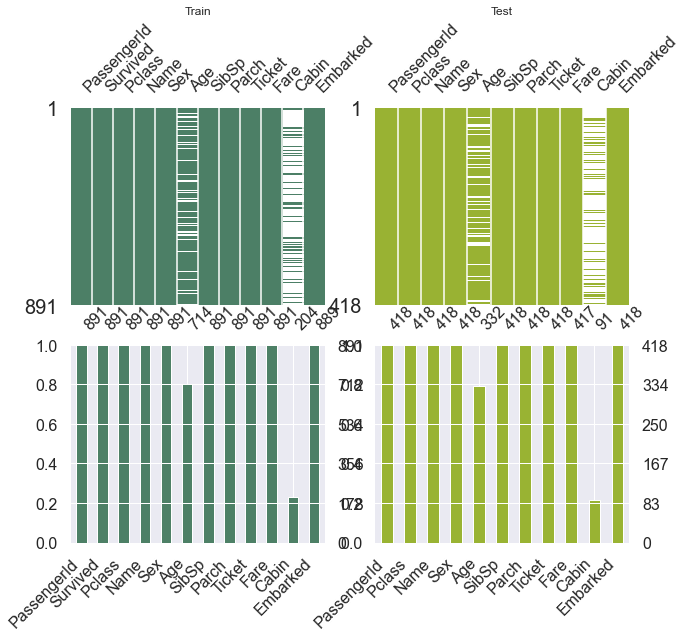

In [8]:
f, ax = plt.subplots(2, 2, figsize=(10, 8))

msno.matrix(df=train, color=(0.3, 0.5, 0.4), ax=ax[0,0])
msno.matrix(df=test, color=(0.6, 0.7, 0.2), ax=ax[0,1])
msno.bar(df=train, color=(0.3, 0.5, 0.4), ax=ax[1,0])
msno.bar(df=test, color=(0.6, 0.7, 0.2), ax=ax[1,1])
ax[0,0].set_title('Train')
ax[0,1].set_title('Test')

### 1.3 Outlier detection

Tukey method
- It defines an interquartile range comprised between the 1st and 3rd quartile of the distribution values (IQR)
- An outlier is a row that have a feature value outside the (IQR +- an outlier step).

In [9]:
def detect_outliers(df, n, features):
    '''
    return observations containing more than n outliers
    according to the Tukey method
    '''
    
    outlier_indices = []
    
    for col in features:
        q1 = np.quantile(df[col], 0.25)
        q3 = np.quantile(df[col], 0.75)
        IQR = q3 - q1
        outlier_list_col = df[(df[col] < q1 - IQR * 1.5) | (df[col] > q3 + IQR * 1.5)].index
        outlier_indices.extend(outlier_list_col)
    
    # Outlier_indices
    # key : outlier를 가지고 있는 row의 index
    # value : for문으로 여러 column을 대입했을 때, 해당 row index에서 outlier가 나타난 column 개수
    outlier_indices = Counter(outlier_indices)
    
    # outlier를 가지고 있는 컬럼 개수가 n개 초과인 경우 해당 row의 index 반환
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

Let's detect outliers from the numerical values features (Age, SibSp, Sarch and Fare)</br>
Then, consider outliers as rows that have at least two outlied numerical values

In [10]:
Outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])

In [11]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [12]:
train = train.drop(Outliers_to_drop, axis=0)

### 1.4 Target 확인 : How many Survived?

- binary classification에서 0과 1의 분포 사전에 확인 필요
- 결과에 따라 모델 평가 방법이 달라질 수 있음

<b>subplots</b>

- subplot 간격 조정 : subplots_adjust(left, bottom, right, top, wspace, hspace)

<b>plot.pie</b>
https://wikidocs.net/92114
- explode : 부채꼴이 파이 차트의 중심에서 벗어나는 정도
- autopct : 부채꼴 안에 표시될 숫자의 형식 지정
- shadow : 파이 차트 그림자 표시 여부

<b>sns.countplot</br>
https://seaborn.pydata.org/generated/seaborn.countplot.html
- Show the counts of observations in each categorical bin using bars.
- palette : 색 설정
- hue='Survived' : 'Survived' 컬럼 범주(0, 1)에 막대를 나누고, 서로 다른 색 설정

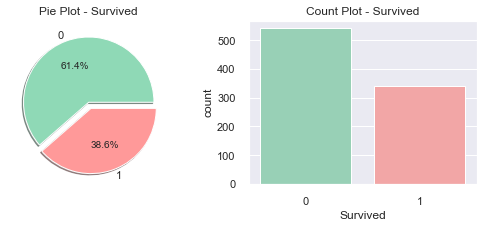

In [13]:
f, ax = plt.subplots(1, 2, figsize=(9,3))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=train, ax=ax[1], palette=colors)
ax[1].set_title('Count Plot - Survived')

plt.show()

## 2. Analyzing The Features

Types of Features
- Categorical Features (Nominal Variables)
- Ordinal Features : have a relative sort in the variable
- Continous Feature

시각화 library : matplotlib, seaborn, plotly 등

### 2.1 Pclass

- ordinal (서수형) 데이터 : 카테고리 + 순서
- Pclass에 따른 생존율 차이 확인 (엑셀 pivot과 유사)

<b>groupby</b>
- as_index=True : 그룹 라벨을 index로 사용
- count() : 전체 개수
- sum() : 'Survived=1'인 사람 총 합
- mean() : 평균 생존율

In [14]:
c = train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=True).count()
s = train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=True).sum()
m = train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=True).mean()

pd.concat([c, s, m], axis=1, keys=['count', 'sum', 'mean'])

,count,sum,mean
,Survived,Survived,Survived
Pclass,,,
1,213,134,0.629108
2,184,87,0.472826
3,484,119,0.245868


<b>pandas의 crosstab 사용하기</b>
- margins=True : 각 행과 열의 총합 보여주기

In [15]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,79,134,213
2,97,87,184
3,365,119,484
All,541,340,881


People say Money Can't Buy Everything. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

- Pclass가 좋을수록 생존율이 높음
- 생존에 Pclass 영향이 크며, 이후 모델 생성 시 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있음

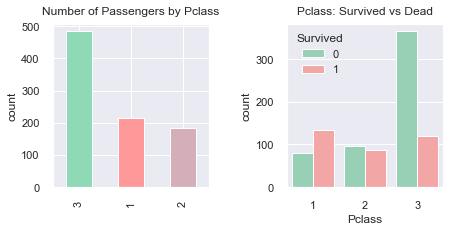

In [16]:
y_position=1.02
f, ax = plt.subplots(1, 2, figsize=(7,3))

train['Pclass'].value_counts().plot.bar(color=colors, ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('count')

sns.countplot('Pclass', hue='Survived', data=train, palette=colors, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.subplots_adjust(wspace=0.5)
plt.show()

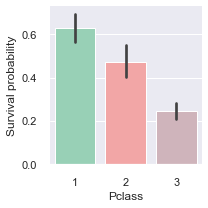

In [17]:
g = sns.factorplot('Pclass', 'Survived', data=train, kind='bar', size=3, palette=colors)
g.despine(left=True)
g.set_ylabels('Survival probability')

subplot 함수

In [18]:
def drawSubplot(col, sort=False):
    y_position=1.02
    f, ax = plt.subplots(1, 3, figsize=(12,3))
    
    train[col].value_counts().plot.bar(color=colors, ax=ax[0])
    ax[0].set_title('Number of Passengers by {}'.format(col), y=y_position)
    ax[0].set_ylabel('count')
    
    if sort == True:
        train[[col, 'Survived']].groupby([col], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(color=colors, ax=ax[1])
        ax[1].set_title('Survived vs {}'.format(col))
        ax[1].set_ylabel('rate')
    else:
        train[[col, 'Survived']].groupby([col], as_index=True).mean().plot.bar(color=colors, ax=ax[1])
        ax[1].set_title('Survived vs {}'.format(col))
        ax[1].set_ylabel('rate')
    
    sns.countplot(col, hue='Survived', data=train, palette=colors, ax=ax[2])
    ax[2].set_title('{}: Survived vs Dead'.format(col), y=y_position)
    
    plt.subplots_adjust(wspace=0.5)
    plt.show()

### 2.2 Sex

- 성별에 따른 생존율 차이 확인

In [19]:
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,78,231,309
male,463,109,572
All,541,340,881


In [20]:
train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

- 여성의 생존율이 더 높음
- 생존에 Sex 영향이 크며, 이후 모델 생성 시 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있음

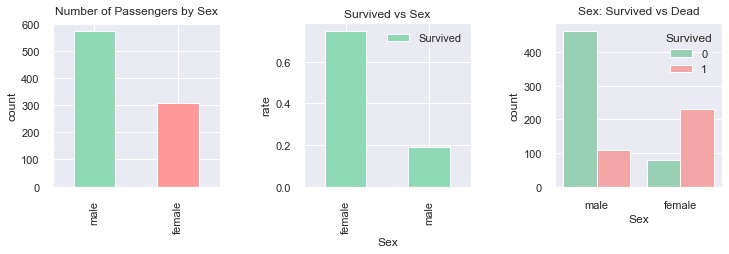

In [21]:
drawSubplot('Sex')

### 2.2.1 Pclass and Sex

<b>seaborn factorplot</b>
- 3차원 그래프
- We use FactorPlot in this case, because they make the seperation of categorical values easy
- aspect : 높이는 고정한 상태에서 너비 비율 조정

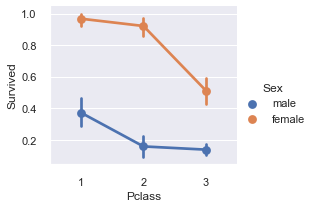

In [22]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, size=3, aspect=1.2)

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

- 모든 class에서 female의 생존율이 높음
- 성별과 상관없이 class가 높을수록 생존율이 높음

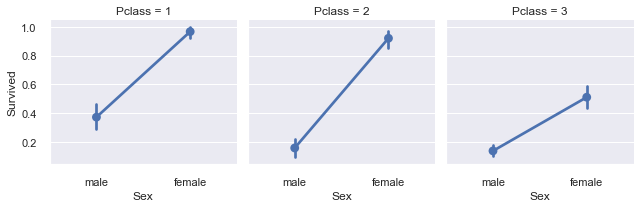

In [23]:
sns.factorplot('Sex', 'Survived', col='Pclass', data=train, size=3, aspect=1)

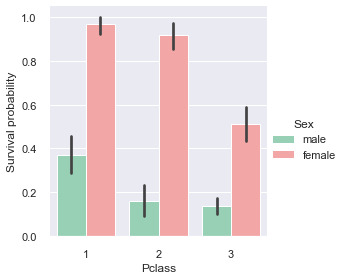

In [24]:
g = sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, kind='bar', size=4, palette=colors)
g.despine(left=True)
g.set_ylabels('Survival probability')

### 2.3 Age

In [25]:
print("제일 나이 많은 탑승객 : {:.1f} Years".format(train['Age'].max()))
print("제일 나이 어린 탑승객 : {:.1f} Years".format(train['Age'].min()))
print("탑승객 평균 나이      : {:.1f} Years".format(train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균 나이      : 29.7 Years


생존에 따른 Age histogram
- 나이가 어린 생존자가 많음
- Class가 높을수록 나이 많은 사람의 비중이 커짐

<b>Distribution plot</b>

map(function, iterable)
- iterable : 반복 가능한 자료형(리스트, 튜플 등)
- 두 번째 인자로 들어온 반복 가능한 자료형을 첫 번째 인자로 들어온 함수에 하나씩 넣어 함수 수행

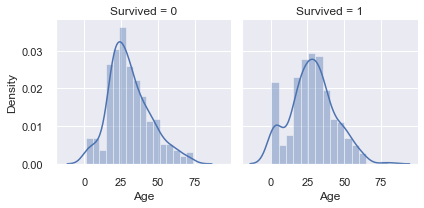

In [26]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age')

<b>kdeplot</b>
- 커널밀도추정 그래프 (Kernel Density Estimator)
- 히스토그램 같은 분포를 스무딩해서 곡선으로 그려주는 것

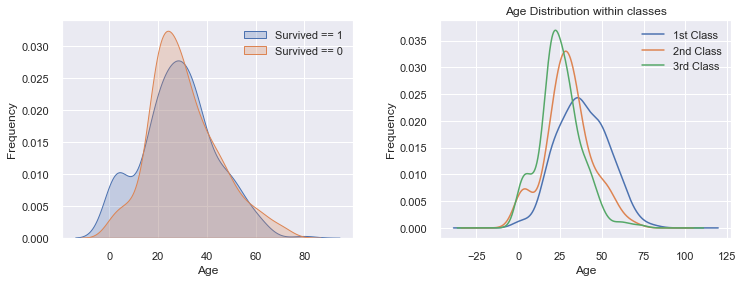

In [27]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax[0], shade=True)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax[0], shade=True)
ax[0].set_ylabel('Frequency')
ax[0].legend(['Survived == 1', 'Survived == 0'])

train['Age'][train['Pclass'] == 1].plot(kind='kde', ax=ax[1])
train['Age'][train['Pclass'] == 2].plot(kind='kde', ax=ax[1])
train['Age'][train['Pclass'] == 3].plot(kind='kde', ax=ax[1])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Age Distribution within classes')
ax[1].legend(['1st Class', '2nd Class', '3rd Class'])

plt.subplots_adjust(wspace=0.3)
plt.show()

연령 * 생존율
- 나이가 어릴수록 생존율이 높음
- 생존에 Age 영향이 크며, 이후 모델 생성 시 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있음

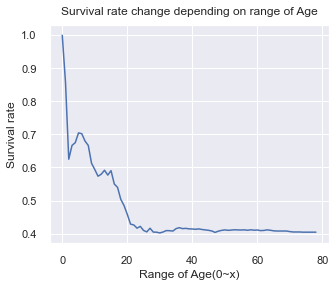

In [28]:
cummulate_survival_rate = []

for i in range(1, int(train['Age'].max())):
    cummulate_survival_rate.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]))

plt.figure(figsize=(5,4))
plt.plot(cummulate_survival_rate)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.xlabel('Range of Age(0~x)')
plt.ylabel('Survival rate')
plt.show()

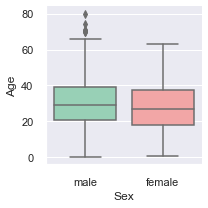

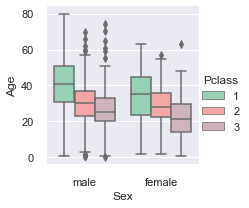

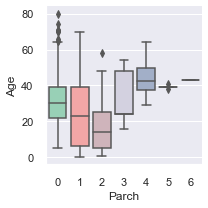

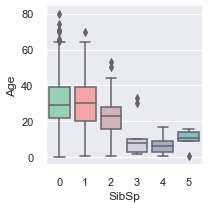

In [29]:
sns.factorplot('Sex','Age',data=train,kind='box',palette=colors,size=3)
sns.factorplot('Sex','Age',hue='Pclass',data=train,kind='box',palette=colors,size=3)
sns.factorplot('Parch','Age',data=train,kind='box',palette=colors,size=3)
sns.factorplot('SibSp','Age',data=train,kind='box',palette=colors,size=3)

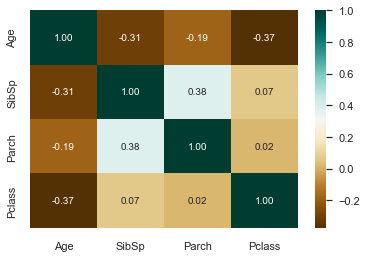

In [30]:
g = sns.heatmap(train[['Age','Sex','SibSp','Parch','Pclass']].corr(), cmap='BrBG', annot=True, fmt='.2f')

### 2.3.1 Pclass, Sex, Age

<b>seaborn violinplot</b>
- x축 : 명목형 변수 (Pclass, Sex)
- y축 : 수치형 변수의 distribution (Age)

- The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass
- Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women
- For males, the survival chances decreases with an increase in age.

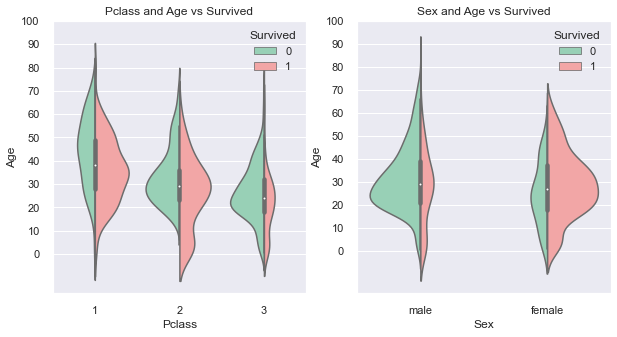

In [31]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot('Pclass', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[0], palette=colors)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=train, scale='count', split=True, ax=ax[1], palette=colors)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### 2.3.2 Filling NaN Ages

As we had seen earlier, the Age feature has many null values. Since there is subpopulations that have more chance to survive (children for example), it is preferable to <b>keep the age feature and to impute the missing values.</b>

To adress this problem, let's looked at the most correlated features with Age. (Sex, Parch , Pclass and SibSP)

Age distribution seems to be the same in Male and Female subpopulations, so Sex is not informative to predict Age. However, 1rst class passengers are older than 2nd class passengers who are also older than 3rd class passengers.

Moreover, the more a passenger has parents/children the older he is and the more a passenger has siblings/spouses the younger he is.

To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that <b>the names have a salutation like Mr or Mrs.</b> Thus we can assign the mean values of Mr and Mrs to the respective groups.

<b>Method 1</b>

정규 표현식
- https://wikidocs.net/4308
- + : 최소 1개 이상
- \\. : (정규 표현식에서 .(dot)의 역할을 하는 것이 아닌) 실제 .이 나오는 지점을 찾음
- ([A-Za-z]+)\. : It looks for strings which lie between A-Z or a-z and followed by a .(dot)

In [32]:
train['Initial'] = 0
for i in train:
    train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')

for i in test:
    test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

<b>Method 2</b>

- .split(',')[1] : 먼저 train['Name'] 값을 ',' 기준으로 분리하고 리스트에서 1번째 값 선택 -> ['Braund', ' Mr. Owen Harris']
- .split('.')[0] : 1번째 값을 다시 '.' 기준으로 분리하고 리스트에서 0번째 값 선택 -> [' Mr', ' Owen Harris']
- strip() : 공백 제거 -> 'Mr'

In [33]:
'''
initial = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]
train['Initial'] = pd.Series(initial)
'''

"\ninitial = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]\ntrain['Initial'] = pd.Series(initial)\n"

<b>Check the result</b>

In [34]:
train['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 881, dtype: object

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


plt.setp : 선 모양 option
- https://wikidocs.net/13574
- plt.setp(line, color='r', linewidth=3.0)

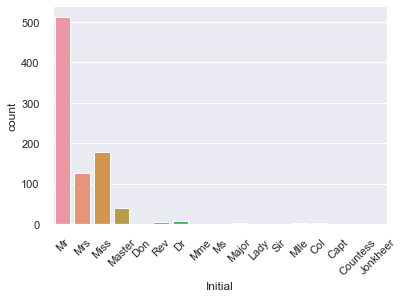

In [36]:
g = sns.countplot(x='Initial', data=train)
g = plt.setp(g.get_xticklabels(), rotation=45)

Check the 'Initial' with the 'Sex'

In [37]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,177,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,39,0,0,0,513,0,0,6,1


In [38]:
pd.crosstab(test.Initial, train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Rev
Sex,,,,,,,,
female,0,0,1,6,26,93,31,0
male,2,1,0,14,51,144,40,2


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [39]:
train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                         ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
                         inplace=True)

test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'],
                        inplace=True)

In [40]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.837838
Mr        32.773284
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [41]:
test.groupby('Initial')['Age'].mean()

Initial
Master     7.406471
Miss      21.774844
Mr        32.151351
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Initial', ylabel='count'>

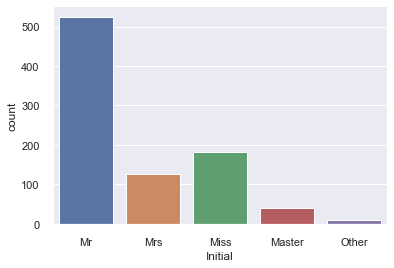

In [42]:
sns.countplot(train['Initial'])

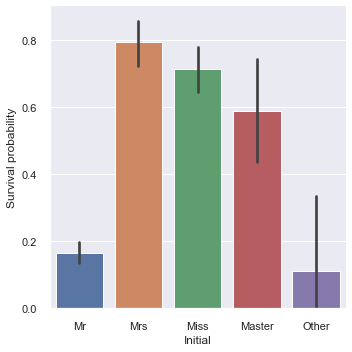

In [43]:
g = sns.factorplot('Initial','Survived',data=train,kind='bar')
g = g.set_ylabels('Survival probability')

In [44]:
names = ['Master', 'Miss', 'Mr', 'Mrs', 'Other']

for name in names:
    train.loc[(train.Age.isnull()) & (train.Initial == name), 'Age'] = train.groupby('Initial')['Age'].mean()[name]
    test.loc[(test.Age.isnull()) & (test.Initial == name), 'Age'] = test.groupby('Initial')['Age'].mean()[name]

Check any null value left

In [45]:
print(train.Age.isnull().any(), test.Age.isnull().any())
print(train.Initial.isnull().any(), test.Initial.isnull().any())

False False
False False


<b>Observations:</b>
1) The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy)</br>
2) The oldest Passenger was saved(80 years)</br>
3) Maximum number of deaths were in the age group of 30-40</br>

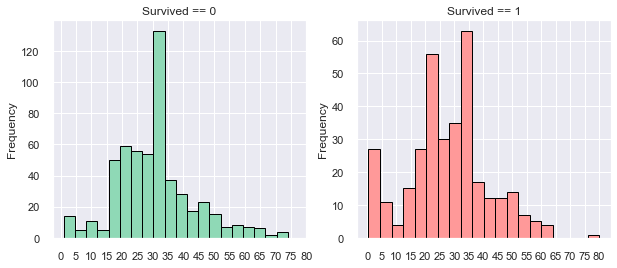

In [46]:
f, ax = plt.subplots(1, 2, figsize=(10, 4))
train[train['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color=colors[0])
ax[0].set_title('Survived == 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color=colors[1])
ax[1].set_title('Survived == 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

<b>Method 2 : Fill Age NaN with the median age of similar rows according to Pclass, Parch, and SibSp</b>

- 현재 Age가 NaN인 행과 똑같은 SibSp, Parch, Pclass 값을 가지고 있는 행들을 찾아, 해당 행들의 median() 값 대입

In [47]:
'''
index_nan_age = list(train['Age'][train['Age'].isnull()].index)

for i in index_nan_age:
    age_med = train['Age'].median()
    age_pred = train['Age'][(train['SibSp'] == train.iloc[i]['SibSp'])
                            & (train['Parch'] == train.iloc[i]['Parch'])
                            & (train['Pclass'] == train.iloc[i]['Pclass'])].median()
    if not np.isnan(age_pred):
        train['Age'].iloc[i] = age_pred
    else:
        train['Age'].iloc[i] = age_med
'''

"\nindex_nan_age = list(train['Age'][train['Age'].isnull()].index)\n\nfor i in index_nan_age:\n    age_med = train['Age'].median()\n    age_pred = train['Age'][(train['SibSp'] == train.iloc[i]['SibSp'])\n                            & (train['Parch'] == train.iloc[i]['Parch'])\n                            & (train['Pclass'] == train.iloc[i]['Pclass'])].median()\n    if not np.isnan(age_pred):\n        train['Age'].iloc[i] = age_pred\n    else:\n        train['Age'].iloc[i] = age_med\n"

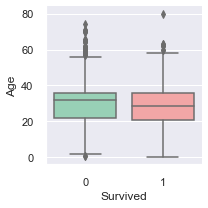

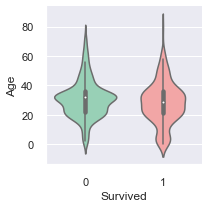

In [48]:
sns.factorplot('Survived', 'Age', data=train, kind='box', palette=colors, size=3)
sns.factorplot('Survived', 'Age', data=train, kind='violin', palette=colors, size=3)

### 2.3.3 Pclass, Initial

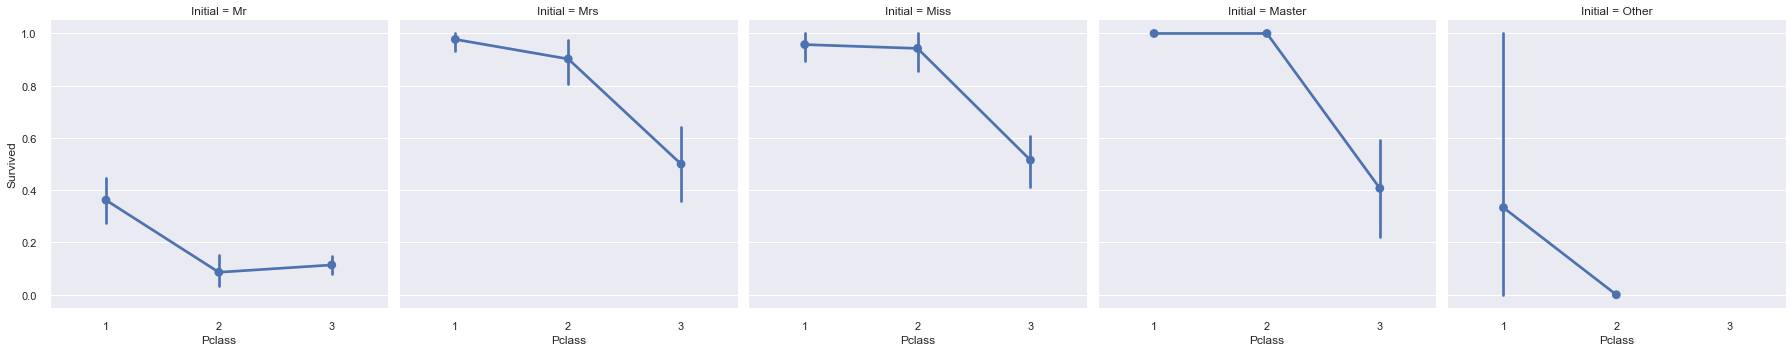

In [49]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=train)
plt.show()

### 2.4 Embarked

In [50]:
pd.crosstab([train['Embarked'], train['Pclass']], [train['Sex'], train['Survived']], margins=True).style.background_gradient(cmap='summer_r')

- 탑승 항구 'C'의 생존율이 가장 높음

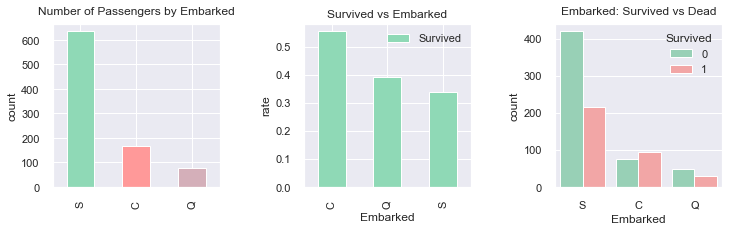

In [51]:
drawSubplot('Embarked', True)

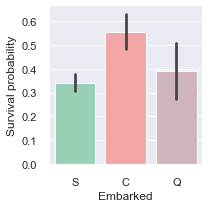

In [52]:
g = sns.factorplot('Embarked', 'Survived', data=train, kind='bar', size=3, palette=colors)
g.despine(left=True)
g.set_ylabels('Survival probability')

<b>Observations:</b>
1) Maximum passenegers boarded from S. Majority of them being from Pclass3.</br>
2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.</br>
3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.</br>
4) Port Q had almost 95% of the passengers were from Pclass3.

Text(0.5, 1.0, '(4) Embarked vs Pclass')

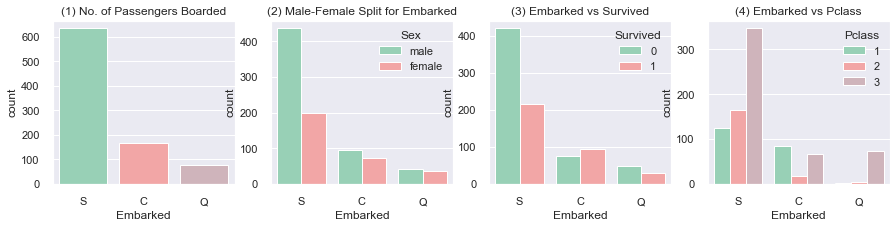

In [53]:
f, ax = plt.subplots(1, 4, figsize=(15, 3))
sns.countplot('Embarked', data=train, ax=ax[0], palette=colors)
sns.countplot('Embarked', hue='Sex', data=train, ax=ax[1], palette=colors)
sns.countplot('Embarked', hue='Survived', data=train, ax=ax[2], palette=colors)
sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[3], palette=colors)
ax[0].set_title('(1) No. of Passengers Boarded')
ax[1].set_title('(2) Male-Female Split for Embarked')
ax[2].set_title('(3) Embarked vs Survived')
ax[3].set_title('(4) Embarked vs Pclass')

Chances for Survival by Port Of Embarkation

- plt.gcf() : 현재 Figure 객체 가져오기

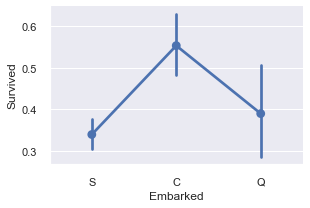

In [54]:
sns.factorplot('Embarked', 'Survived', data=train, size=3)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

<b>Observations:</b>
1) The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.</br>
2) Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low. (Money Matters)</br>
3) Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

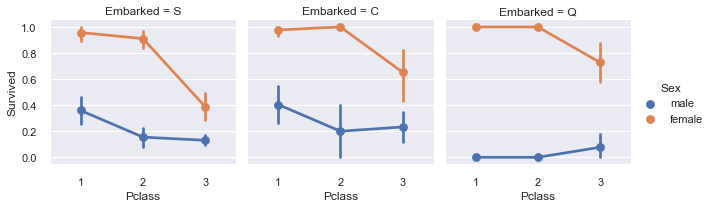

In [55]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=train, size=3)
plt.show()

### 2.4.1 Filling Embarked NaN

As we saw that maximum passengers boarded from Port S, we replace NaN with S

In [56]:
train['Embarked'].fillna('S', inplace=True)

In [57]:
train.Embarked.isnull().any()

False

### 2.5 SibSp

- This feature represents whether a person is alone or with his family members.
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [58]:
pd.crosstab(train.SibSp, train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,11,2
4,15,3
5,5,0


In [59]:
pd.crosstab(train.SibSp, train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,0,1,12
4,0,0,18
5,0,0,5


- set(title='', xlabel='', ylabel='')

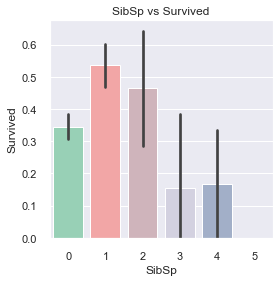

In [60]:
plt.subplots(figsize=(4,4))
sns.barplot('SibSp','Survived',data=train, palette=colors).set(title='SibSp vs Survived')
plt.show()

despine()
- A function that removes the spines from the right and upper portion of the plot by default
- sns.despine(left = True) helps remove the spine from the left
- Spines are the lines connecting the axis tick marks and noting the boundaries of the data area

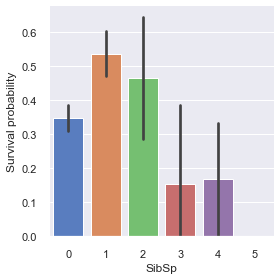

In [61]:
g = sns.factorplot('SibSp','Survived',data=train,kind='bar',size=4,palette='muted')
g.despine(left=True)
g.set_ylabels('Survival probability')

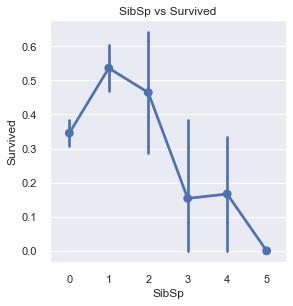

In [62]:
sns.factorplot('SibSp','Survived',data=train).set(title='SibSp vs Survived')
plt.gcf().set_size_inches(4,4)
plt.show()

<b>Observations:</b>

The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

### 2.6 Parch

- 부모/자녀
- Larger families were in Pclass3.

In [63]:
pd.crosstab(train.Parch, train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,18,16,36
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


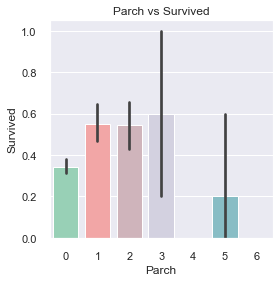

In [64]:
plt.subplots(figsize=(4,4))
sns.barplot(train.Parch, train.Survived, palette=colors).set(title='Parch vs Survived')
plt.show()

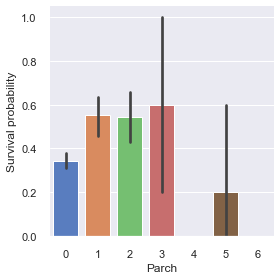

In [65]:
g = sns.factorplot('Parch','Survived',data=train,kind='bar',size=4,palette='muted')
g.despine(left=True)
g.set_ylabels('Survival probability')

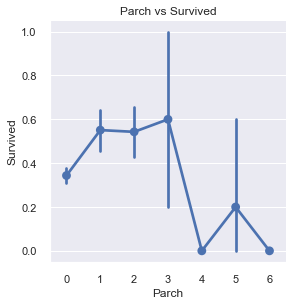

In [66]:
sns.factorplot('Parch', 'Survived', data=train).set(title='Parch vs Survived')
plt.gcf().set_size_inches(4,4)
plt.show()

<b>Observations:</b>

Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

### 2.7 Fare

- 탑승 요금
- continuous feature

In [67]:
print('Highest Fare was : ', train['Fare'].max())
print('Lowest Fare was : ', train['Fare'].min())
print('Average Fare was : ', train['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  31.121565607264436


Histogram : Distribution Plot
- https://seaborn.pydata.org/generated/seaborn.distplot.html
- label : Legend label for the relevant component of the plot.

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

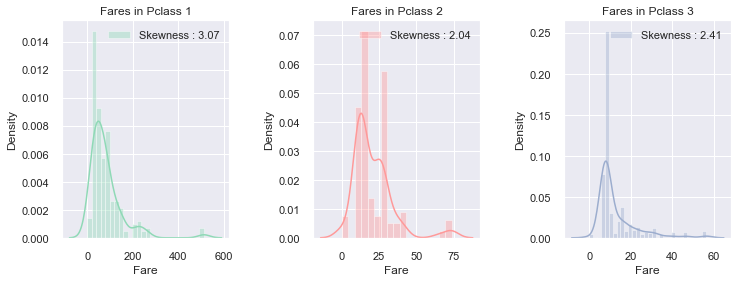

In [68]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.distplot(train[train['Pclass'] == 1].Fare, ax=ax[0], color=colors[0],
             label='Skewness : %.2f'%(train[train['Pclass']==1]['Fare'].skew()))
ax[0].set_title('Fares in Pclass 1')
ax[0].legend(loc='best')
sns.distplot(train[train['Pclass'] == 2].Fare, ax=ax[1], color=colors[1],
             label='Skewness : %.2f'%(train[train['Pclass']==2]['Fare'].skew()))
ax[1].set_title('Fares in Pclass 2')
ax[1].legend(loc='best')
sns.distplot(train[train['Pclass'] == 3].Fare, ax=ax[2], color=colors[4],
            label='Skewness : %.2f'%(train[train['Pclass']==3]['Fare'].skew()))
ax[2].set_title('Fares in Pclass 3')
ax[2].legend(loc='best')
plt.subplots_adjust(wspace=0.5)
plt.show()

- 비대칭 그래프 (high skewness)
- 해당 데이터 학습 시 모델이 outlier에 민감하게 반응해서 성능이 떨어질 수 있음
- outlier의 영향을 줄이기 위해 'Fare' 데이터에 'log' 적용
- cf) 이 부분은 사실 feature engineering (모델의 성능 향상을 위해 feature를 조작하거나, 새로운 feature 추가하는 작업)

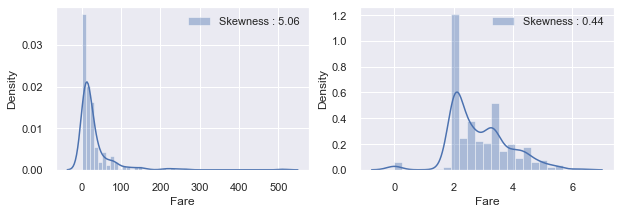

In [69]:
f, ax = plt.subplots(1, 2, figsize=(10, 3))

sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax[0])
ax[0].legend(loc='best')   # label 위치

# Null 값 -> mean 대체
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean()

# log 적용
train['Fare'] = train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax[1])
ax[1].legend(loc='best')   # label 위치

### 2.8 Cabin

In [70]:
train['Cabin'][train['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Cabin에서 첫글자만 가져오기

In [71]:
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin']])

<AxesSubplot:xlabel='Cabin', ylabel='count'>

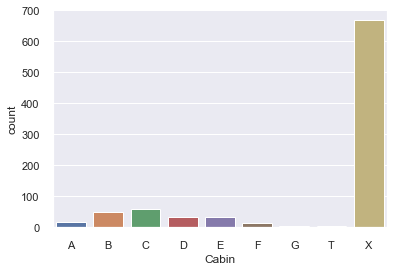

In [72]:
sns.countplot(train['Cabin'], order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X'])

Because of the low number of passenger that have a cabin, survival probabilities have an important standard deviation and we can't distinguish between survival probability of passengers in the different desks.

But we can see that passengers with a cabin have generally more chance to survive than passengers without (X).

It is particularly true for cabin B, C, D, E and F.

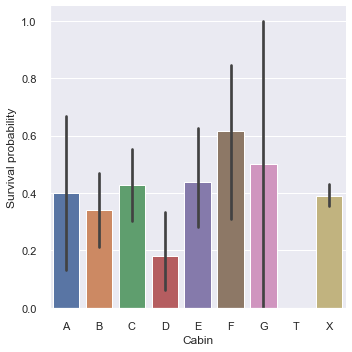

In [73]:
g = sns.factorplot('Cabin','Survived',data=train,kind='bar',order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X'])
g = g.set_ylabels('Survival probability')

### 2.9 Ticket

- 값이 매우 다양한 범주형 변수 (string)

In [74]:
train['Ticket'].value_counts()

347082      7
1601        7
3101295     6
CA 2144     6
347088      6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

It could mean that <b>tickets sharing the same prefixes could be booked for cabins placed together.</b> It could therefore lead to the actual placement of the cabins within the ship. <b>Tickets with same prefixes may have a similar class and survival.</b>

So i decided to replace the Ticket feature column by the ticket prefixe. Which may be more informative.

In [75]:
ticket = []

for i in list(train.Ticket):
    if not i.isdigit():
        ticket.append(i.replace('.', '').replace('/','').strip().split(' ')[0])
    else:
        ticket.append('X')

train['Ticket'] = ticket
train['Ticket'].value_counts()

X          658
PC          60
CA          34
A5          21
SOTONOQ     15
STONO       12
WC          10
SCPARIS      7
A4           7
STONO2       6
SOC          6
FCC          5
C            5
SCParis      4
LINE         4
WEP          3
SCAH         3
SOPP         3
PP           3
SOTONO2      2
SWPP         2
PPP          2
FC           1
AS           1
SCOW         1
SC           1
SP           1
Fa           1
SOP          1
SCA4         1
CASOTON      1
Name: Ticket, dtype: int64

### 2.10 Observations in a Nutshell for all features

- <b>Sex</b> : The chance of survival for women is high as compared to men.
- <b>Pclass</b> : There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.
- <b>Age</b> : Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.
- <b>Embarked</b> : This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.
- <b>SibSp + Parch</b> : Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

### 2.11 Correlation Between The Features

heatmap
- annot : heatmap 안에 corr 숫자 보이기

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

<b>MultiColinearity 다중공선성</b>
- Highly or perfectly correlated
- Both the features are containing highly similar information and there is very little or no variance in information
- Both of them contains almost the same information.
- While making or training models, we should try to <b>eliminate redundant features</b> as it reduces training time and many such advantages.

Now from the below heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

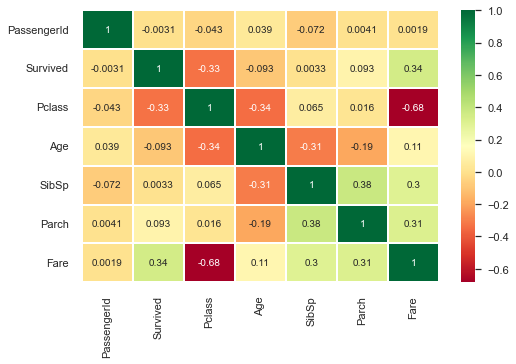

In [76]:
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

Numerical values

- Only Fare feature seems to have a significative correlation with the survival probability.
- It doesn't mean that the other features are not useful

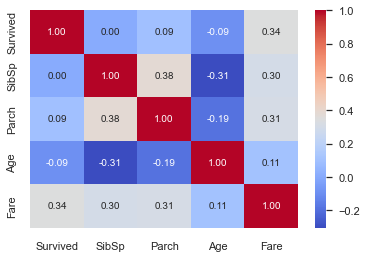

In [77]:
g = sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt = ".2f", cmap="coolwarm")

# Part2: Feature Engineering and Data Cleaning

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

## 1. Convert Continous values into Categorical

- By either Binning or Normalisation

### 1.1 Age_band

In [78]:
train['Age_band'] = 0
train.loc[train['Age'] <= 16, 'Age_band'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age_band'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age_band'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age_band'] = 3
train.loc[(train['Age'] > 64), 'Age_band'] = 4
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5,1.981001,X,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,4.266662,C,C,Mrs,2


In [79]:
test['Age_band'] = 0
test.loc[test['Age'] <= 16, 'Age_band'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age_band'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age_band'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age_band'] = 3
test.loc[(test['Age'] > 64), 'Age_band'] = 4
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.05786,NaN,Q,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.94591,NaN,S,Mrs,2


to_frame()
- 시리즈를 데이터 프레임으로 변환

In [80]:
train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,376
2,322
0,103
3,69
4,11


The survival rate decreases as the age increases irrespective of the Pclass.

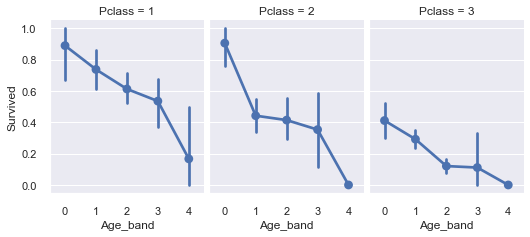

In [81]:
sns.factorplot('Age_band', 'Survived', data=train, col='Pclass')
f = plt.gcf()
f.set_size_inches(7,3)
plt.show()

### 1.2 FamilySize and Alone

- Family : SibSp (형제/자매/남편/아내) + Parch(부모/자녀) + 1(본인)

In [82]:
train['FamilySize'] = 0
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

test['FamilySize'] = 0
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train['Alone'] = 0
train.loc[train.FamilySize == 1, 'Alone'] = 1

test['Alone'] = 0
test.loc[test.FamilySize == 1, 'Alone'] = 1

print("Maximum size of Family : {}".format(train['FamilySize'].max()))
print("Minimum size of Family : {}".format(train['FamilySize'].min()))

Maximum size of Family : 8
Minimum size of Family : 1


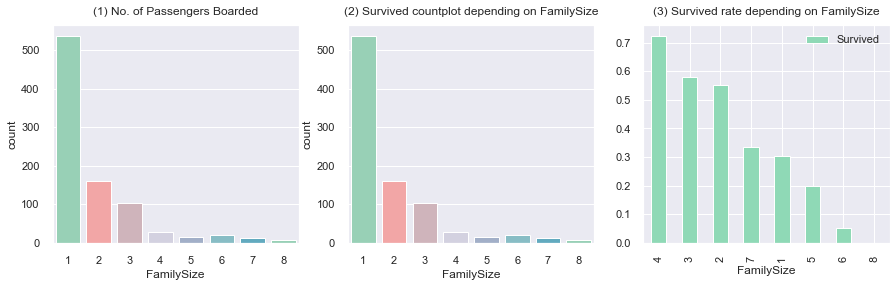

In [83]:
f, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot('FamilySize', data=train, ax=ax[0], palette=colors)
sns.countplot('FamilySize', data=train, ax=ax[1], palette=colors)
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2], color=colors)

ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Family_Size=1 means that the passeneger is alone. Clearly, if you are alone,then chances for survival is very low.
- For family size > 4,the chances decrease too
- This also looks to be an important feature for the model

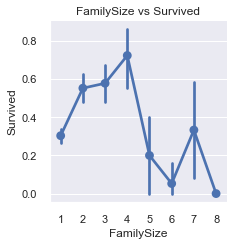

In [84]:
sns.factorplot('FamilySize', 'Survived', data=train).set(title='FamilySize vs Survived')
f = plt.gcf()
f.set_size_inches(3,3)

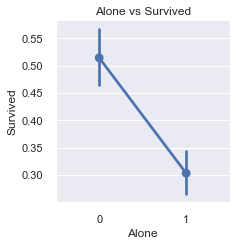

In [85]:
sns.factorplot('Alone', 'Survived', data=train).set(title='Alone vs Survived')
f = plt.gcf()
f.set_size_inches(3,3)

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

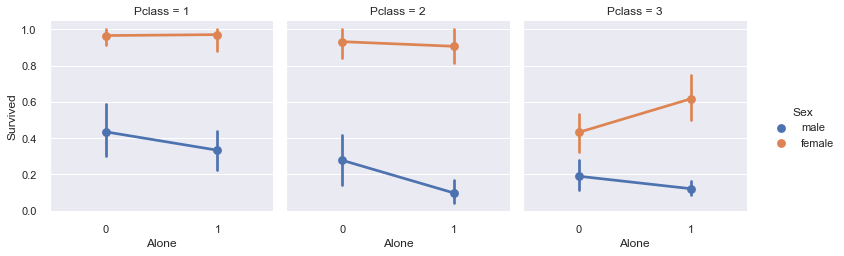

In [86]:
sns.factorplot('Alone', 'Survived', data=train, hue='Sex', col='Pclass', size=3)
f = plt.gcf()
f.set_size_inches(12,4)
plt.show()

### 1.3 FareRange

- Convert continous values into <b>ordinal</b> values
- Use <b>pandas.qcut</b>
- <b>qcut</b> : It splits or arranges the values according the number of bins we have passed

As the FareRange increases, the chances of survival increases

In [87]:
train['FareRange'] = pd.qcut(train['Fare'], q=4)
test['FareRange'] = pd.qcut(test['Fare'], q=4)

train.groupby(['FareRange'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
FareRange,
"(-0.001, 2.066]",0.197309
"(2.066, 2.671]",0.303571
"(2.671, 3.418]",0.456221
"(3.418, 6.239]",0.594470


In [88]:
train['Fare_cat'] = 0
train.loc[train['Fare'] <= 2.068, 'Fare_cat'] = 0
train.loc[(train['Fare'] > 2.068) & (train['Fare'] <= 2.671), 'Fare_cat'] = 1
train.loc[(train['Fare'] > 2.671) & (train['Fare'] <= 3.434), 'Fare_cat'] = 2
train.loc[(train['Fare'] > 3.434) & (train['Fare'] <= 6.239), 'Fare_cat'] = 3

In [89]:
test['Fare_cat'] = 0
test.loc[test['Fare'] <= 2.068, 'Fare_cat'] = 0
test.loc[(test['Fare'] > 2.068) & (test['Fare'] <= 2.671), 'Fare_cat'] = 1
test.loc[(test['Fare'] > 2.671) & (test['Fare'] <= 3.434), 'Fare_cat'] = 2
test.loc[(test['Fare'] > 3.434) & (test['Fare'] <= 6.239), 'Fare_cat'] = 3

This feature may become an important feature during modeling along with the Sex.

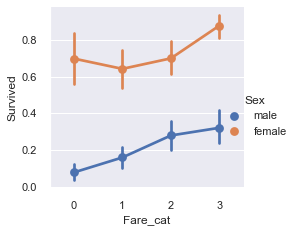

In [90]:
sns.factorplot('Fare_cat', 'Survived', data=train, hue='Sex')
f = plt.gcf()
f.set_size_inches(4,3)
plt.show()

## 2. Convert String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values

<b>Method1 : Use replace function</b>

In [91]:
train['Sex'].replace(['male','female'], [0,1], inplace=True)
train['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
train['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

test['Sex'].replace(['male','female'], [0,1], inplace=True)
test['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
test['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

<b>Method2 : Use map function</b>

In [92]:
'''
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
'''

"\ntrain['Sex'] = train['Sex'].map({'male':0, 'female':1})\n"

<b>Method3 : Use pd.get_dummies function</b>

- category 별 각 column 생성

prefix
- 생성할 dummy variable의 column 이름 앞에 붙을 prefix 지정
- ex) category : C, Q, S -> prefix='Em' -> column names : Em_C, Em_Q, Em_S

In [93]:
'''
train = pd.get_dummies(train, columns=['Embarked'], prefix='Em')

train['Pclass'] = train['Pclass'].astype('category')
train = pd.get_dummies(train, columns=['Pclass'], prefix='Pc')
'''

"\ntrain = pd.get_dummies(train, columns=['Embarked'], prefix='Em')\n\ntrain['Pclass'] = train['Pclass'].astype('category')\ntrain = pd.get_dummies(train, columns=['Pclass'], prefix='Pc')\n"

## 3 Dropping Unneeded Features

- Name : We don't need name feature as it cannot be converted into any categorical value.
- Age : We have the Age_band feature, so no need of this.
- Ticket : It is any random string that cannot be categorised.
- Fare : We have the Fare_cat feature, so unneeded
- Cabin : A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.
- Fare_Range : We have the fare_cat feature.
- PassengerId : Cannot be categorised.

In [94]:
dropCols = ['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'FareRange', 'PassengerId']

train.drop(dropCols, axis=1, inplace=True)
test.drop(dropCols, axis=1, inplace=True)

Heatmap
- linewidths : 경계선
- annot_kws : Heatmap 안에 표시된 글자 크기

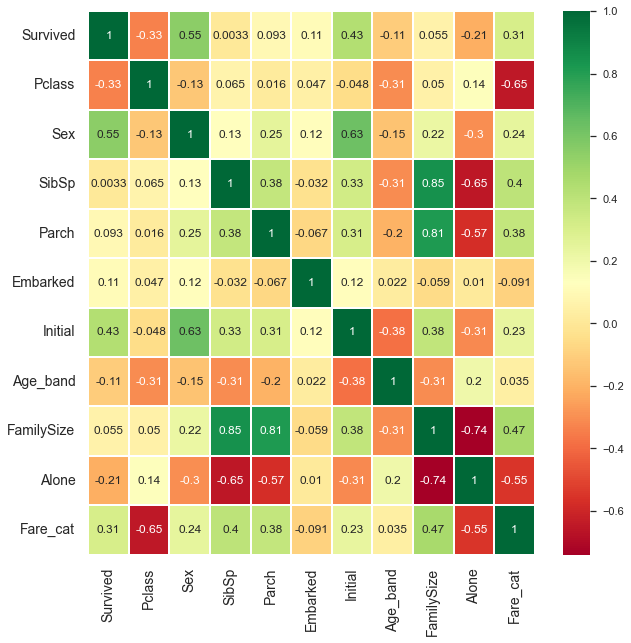

In [95]:
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':12})
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

1) Logistic Regression</br>
2) Support Vector Machines(Linear and radial)</br>
3) Random Forest</br>
4) K-Nearest Neighbors</br>
5) Naive Bayes</br>
6) Decision Tree</br>

In [96]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import xgboost as xg

from sklearn import metrics
from sklearn.metrics import confusion_matrix

## 1. Split Dataset

In [97]:
X = train[train.columns[1:]]
y = train['Survived']

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 2. Create Models

Compare popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedures

- Logistic regression
- SVC (rbf, linear)
- KNN
- Naive Bayes
- Decision Tree
- Random Forest
- AdaBoost
- Gradient Boosting
- Extra Trees
- Multiple layer perceprton (neural network)
- Linear Discriminant Analysis

<b>1) Ensembling</b>
- Ensembling is a good way to increase the accuracy or performance of a model
- In simple words, it is the combination of various simple models to create a single powerful model
- It improves the stability of the model
- Type : <b>1) Voting Classifier 2) Bagging 3) Boosting.</b>

<b>1-1) Boosting</b>

- An ensembling technique which uses sequential learning of classifiers
- It is a <b>step by step enhancement of a weak model</b>

- A model is first trained on the complete dataset
- Now in the next iteration, the learner will <b>focus more on the wrongly predicted instances or give more weight</b> to it
- Thus it will try to predict the wrong instance correctly
- Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy
</br>
- The weak learner or estimator in this case is a <b>Decsion Tree</b> (default)
- But we can change the dafault base_estimator to any algorithm of our choice

<b>2) XGBoost</b>

https://xgboost.readthedocs.io/en/stable/parameter.html
</br></br>
objective
- linear (default)
- binary:logistic - 이항 분류 문제 로직스틱 회귀모형으로 예측 확률 반환
- multi:softmax - 다항 분류 문제의 경우 Softmax를 사용해서 클래스 분류, num_class도 지정해야함
- multi:softprob - 각 클래스 범주에 속하는 예측 확률 반환</br>
</br>

eval_metric
- 설정한 objective별로 기본설정값이 지정되어 있음
- rmse: root mean square error
- mae: mean absolute error
- logloss: negative log-likelihood
- error: Binary classification error rate (0.5 threshold)
- merror: Multiclass classification error rate
- mlogloss: Multiclass logloss
- auc: Area under the curve

In [98]:
random_state = 42

lr = LogisticRegression(random_state=random_state)
svc_rbf = SVC(kernel='rbf', C=1, gamma=0.1, random_state=random_state) # Radial
svc_lnr = SVC(kernel='linear', C=0.1, gamma=0.1, random_state=random_state) # Linear
kn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=random_state)
rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
ada = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1)
gbr = GradientBoostingClassifier(random_state=random_state, learning_rate=0.1)
etc = ExtraTreesClassifier(random_state=random_state)
mlp = MLPClassifier(random_state=random_state)
lda = LinearDiscriminantAnalysis()

# eval_metric 설정 시 XGB warning 모두 사라짐
xgb = xg.XGBClassifier(n_estimators=900, random_state=42, learning_rate=0.1, eval_metric='mlogloss')

models = [lr, svc_rbf, svc_lnr, kn, nb, dt, rf, ada, gbr, etc, mlp, lda, xgb]
names = []

for model in models:
    name = model.__class__.__name__
    names.append(name)
    model.fit(X_tr, y_tr)
    pred = model.predict(X_val)
    print("Accuracy of {:<30} : {:.2f}%  {:.2f}%  {:.2f}%".format(name,
                                                                  model.score(X_tr, y_tr) * 100,
                                                                  metrics.accuracy_score(pred, y_val) * 100,
                                                                  model.score(X_val, y_val) * 100))    

Accuracy of LogisticRegression             : 82.14%  78.11%  78.11%
Accuracy of SVC                            : 84.25%  80.00%  80.00%
Accuracy of SVC                            : 81.49%  79.62%  79.62%
Accuracy of KNeighborsClassifier           : 86.04%  76.23%  76.23%
Accuracy of GaussianNB                     : 81.01%  78.87%  78.87%
Accuracy of DecisionTreeClassifier         : 91.23%  76.98%  76.98%
Accuracy of RandomForestClassifier         : 91.23%  76.23%  76.23%
Accuracy of AdaBoostClassifier             : 91.23%  76.98%  76.98%
Accuracy of GradientBoostingClassifier     : 88.15%  79.62%  79.62%
Accuracy of ExtraTreesClassifier           : 91.23%  76.60%  76.60%
Accuracy of MLPClassifier                  : 84.25%  79.25%  79.25%
Accuracy of LinearDiscriminantAnalysis     : 81.82%  78.49%  78.49%
Accuracy of XGBClassifier                  : 91.07%  76.60%  76.60%


### 2.1 K-Nearest Neighbors(KNN)

- n_neighbors : default=5

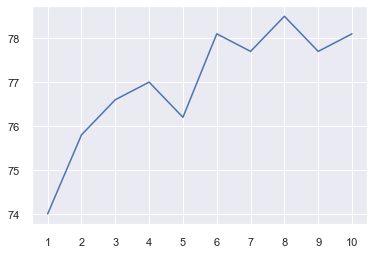

Accuracies for different values of n are :  [74.0, 75.8, 76.6, 77.0, 76.2, 78.1, 77.7, 78.5, 77.7, 78.1] with the max value as  78.5


In [99]:
x = list(range(1,11))
a_index = list(range(1,11))
a = []
#a = pd.Series()

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_tr, y_tr)
    pred = model.predict(X_val)
    a.append(round(metrics.accuracy_score(pred, y_val)*100,1))
    #a = a.append(pd.Series(metrics.accuracy_score(pred, y_val)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches=(6,4)
plt.show()
print("Accuracies for different values of n are : ", a, "with the max value as ", np.max(a))
#print("Accuracies for different values of n are : ", a.values, "with the max value as ", a.values.max())

### 2.2 Voting Classifier

- It is the simplest way of combining predictions from many different simple machine learning models
- It gives an <b>average prediction</b> result based on the prediction of all the submodels
- The submodels or the basemodels are <b>all of different types</b>

- Hard Voting (Majority Voting) : 각각의 모델들이 결과를 예측하면 단순하게 가장 많은 표를 얻은 결과를 선택
- Soft Voting (Probability Voting) : 각 class별로 모델들이 예측한 probability를 합산해서 가장 높은 class 선택

In [100]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [101]:
ensemble_models = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                               ('svm_r', SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1, random_state=42)),
                                               ('svm_l', SVC(probability=True, kernel='linear', random_state=42)),
                                               ('RF', RandomForestClassifier(n_estimators=500, random_state=42)),
                                               ('LR', LogisticRegression(C=0.05, random_state=42)),
                                               ('DT', DecisionTreeClassifier(random_state=42)),
                                               ('NB', GaussianNB())],
                                   voting='soft').fit(X_tr, y_tr)

print("The accuracy for ensembled model is {:.2f}%".format(ensemble_models.score(X_val, y_val) * 100))

cross = cross_val_score(ensemble_models, X_tr, y_tr, cv=10, scoring='accuracy')
print("The cross validated score is {:.2f}%".format(cross.mean() * 100))

The accuracy for ensembled model is 79.25%
The cross validated score is 82.46%


### 2.3 Bagging

- A general ensemble method
- It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions
- Due to the averaging, there is reduction in variance
- Unlike Voting Classifier, Bagging makes use of <b>similar classifiers</b>

### 2.3.1 Bagged KNN

Bagging <b>works best with models with high variance</b>. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours.

In [102]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=42, n_estimators=700)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
rst = cross_val_score(model, X_tr, y_tr, cv=10, scoring='accuracy')
print("The accuracy for bagged KNN is : {:.2f}".format(metrics.accuracy_score(pred, y_val)))
print("The cross validation score for bagged KNN is : {:.2f}".format(rst.mean()))

The accuracy for bagged KNN is : 0.78
The cross validation score for bagged KNN is : 0.82


### 2.3.2 Bagged Decision Tree

In [103]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42, n_estimators=100)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
rst = cross_val_score(model, X_tr, y_tr, cv=10, scoring='accuracy')
print("The accuracy for bagged Decision Tree is : {:.2f}".format(metrics.accuracy_score(pred, y_val)))
print("The cross validation score for bagged Decision Tree is : {:.2f}".format(rst.mean()))

The accuracy for bagged Decision Tree is : 0.77
The cross validation score for bagged Decision Tree is : 0.81


## 3. Cross Validation

- The K-Fold Cross Validation works by first dividing the dataset into k-subsets.</br>
- Reserve 1 part for testing and train the algorithm over the 4 parts.</br>
- We continue the process by changing the testing part in each iteration and training the algorithm over the other parts.</br>
- The accuracies and errors are then averaged to get a average accuracy of the algorithm.</br>
- An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set
- <b>Thus with cross-validation, we can achieve a generalised model.</b>

In [104]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Split the data into 10 equal parts
kfold = KFold(n_splits=10)
m = []
s = []
accuracy = []

for model in models:
    cv_rst = cross_val_score(model, X_tr, y_tr, cv=kfold, scoring='accuracy')
    m.append(cv_rst.mean())
    s.append(cv_rst.std())
    accuracy.append(cv_rst)
    
models_cv_rst = pd.DataFrame({'CV_Mean' : m, 'CV_Std' : s}, index=names)
models_cv_rst

,CV_Mean,CV_Std
LogisticRegression,0.808170,0.058820
SVC,0.832628,0.055649
SVC,0.806610,0.059666
KNeighborsClassifier,0.811581,0.036830
GaussianNB,0.805050,0.050175
DecisionTreeClassifier,0.803517,0.036049
RandomForestClassifier,0.811660,0.031856
AdaBoostClassifier,0.805130,0.040596
GradientBoostingClassifier,0.824643,0.032298
ExtraTreesClassifier,0.813300,0.037044


<AxesSubplot:>

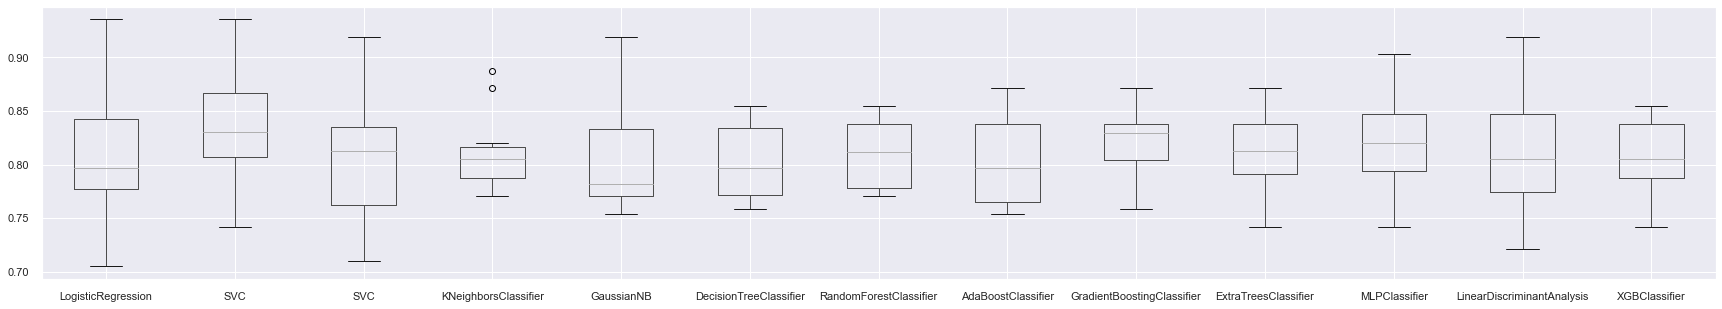

In [105]:
plt.subplots(figsize=(30,5))
box = pd.DataFrame(accuracy, index=names)
box.T.boxplot()

In [106]:
pd.DataFrame(accuracy, index=names).T

,LogisticRegression,SVC,SVC,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,MLPClassifier,LinearDiscriminantAnalysis,XGBClassifier
0,0.854839,0.870968,0.806452,0.790323,0.790323,0.774194,0.774194,0.790323,0.838710,0.806452,0.854839,0.854839,0.741935
1,0.854839,0.887097,0.870968,0.870968,0.854839,0.854839,0.854839,0.854839,0.870968,0.870968,0.903226,0.870968,0.854839
2,0.790323,0.741935,0.709677,0.774194,0.758065,0.758065,0.774194,0.758065,0.758065,0.741935,0.741935,0.741935,0.790323
3,0.935484,0.935484,0.919355,0.887097,0.919355,0.854839,0.854839,0.838710,0.870968,0.854839,0.903226,0.919355,0.854839
4,0.774194,0.838710,0.822581,0.806452,0.774194,0.774194,0.790323,0.758065,0.806452,0.774194,0.790323,0.806452,0.790323
5,0.806452,0.822581,0.838710,0.806452,0.822581,0.838710,0.838710,0.870968,0.822581,0.838710,0.822581,0.822581,0.838710
6,0.704918,0.754098,0.754098,0.770492,0.754098,0.770492,0.770492,0.786885,0.803279,0.803279,0.770492,0.721311,0.754098
7,0.803279,0.852459,0.819672,0.786885,0.836066,0.770492,0.803279,0.754098,0.803279,0.786885,0.819672,0.803279,0.786885
8,0.786885,0.819672,0.737705,0.803279,0.770492,0.819672,0.819672,0.803279,0.836066,0.819672,0.819672,0.770492,0.819672
9,0.770492,0.803279,0.786885,0.819672,0.770492,0.819672,0.836066,0.836066,0.836066,0.836066,0.803279,0.786885,0.836066


- DataFrame.plot. barh : 가로 막대 plot
- DataFrame.plot.bar : 세로 막대 plot
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

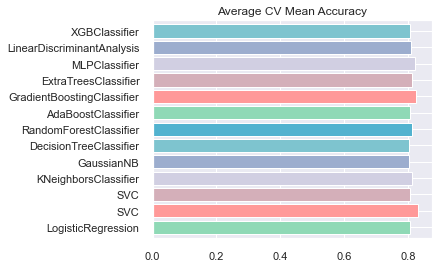

In [107]:
models_cv_rst['CV_Mean'].plot.barh(width=0.8, color=colors)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(5,4)
plt.show()

<b>sns.barplot</b>
- orient='h' : 가로 plot

Text(0.5, 1.0, 'Cross validation scores')

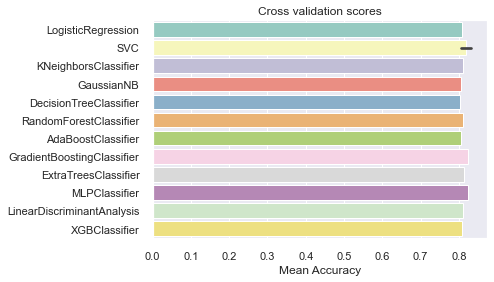

In [108]:
g = sns.barplot('CV_Mean', models_cv_rst.index, data=models_cv_rst, palette='Set3', orient='h')
g.set_xlabel('Mean Accuracy')
g.set_title('Cross validation scores')

## 4. Confusion Matrix

- → Predictions (output)
- ↓ Actual (input)

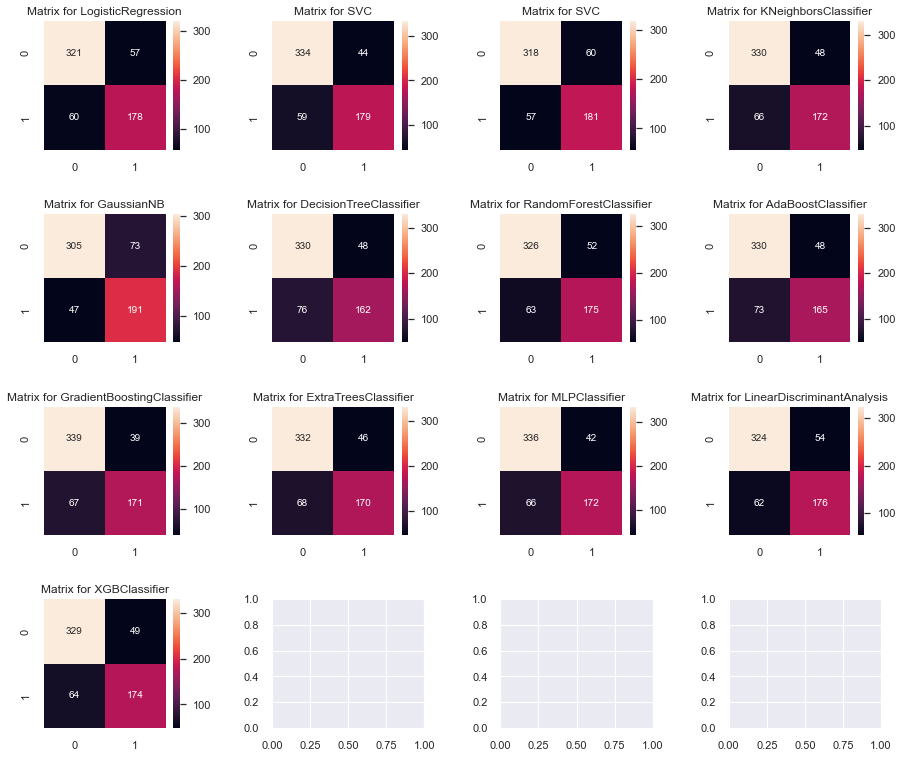

In [109]:
f, ax = plt.subplots(4, 4, figsize=(15,13))

nrow = 0
ncol = 0

for model in models:
    name = model.__class__.__name__
    pred = cross_val_predict(model, X_tr, y_tr, cv=10)
    sns.heatmap(confusion_matrix(y_tr, pred), ax=ax[nrow, ncol], annot=True, fmt='2.0f')
    ax[nrow, ncol].set_title('Matrix for {}'.format(name))
    if ncol < 3:
        ncol += 1
    else:
        ncol = 0
        nrow += 1

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## 5. Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

In [110]:
from sklearn.model_selection import GridSearchCV

### 5.1 SVM

np.arange : list(range()) 와 달리 step 에서 float 허용

GridSearchCV : verbose
- iteration시마다 수행 결과 메시지 출력
- verbose=0(default) : 메시지 출력 안함
- verbose=1 : 간단한 메시지 출력
- verbose=2 : 하이퍼 파라미터별 메시지 출력

In [111]:
params = {'C' : [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
          'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
          'kernel' : ['rbf', 'linear'],
          'random_state' : [42]}

svm_search = GridSearchCV(SVC(random_state=42, probability=True), param_grid = params, cv=kfold, scoring='accuracy', n_jobs=4, verbose=True)
svm_search.fit(X_tr, y_tr)
svm_best = svm_search.best_estimator_
print(svm_search.best_params_)
print(svm_search.best_score_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
{'C': 0.3, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 42}
0.8374669487043892


### 5.2 Random Forest

In [112]:
params = {'n_estimators' : range(100, 1000, 100),
         'max_depth' : [None],
         'min_samples_split' : [2,3,10],
         'min_samples_leaf' : [1,3,10],
         'bootstrap' : [False],
         'criterion' : ['gini'],
         'random_state' : [42]}

rf_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=kfold, scoring='accuracy', n_jobs=4, verbose=True)
rf_search.fit(X_tr, y_tr)
rf_best = rf_search.best_estimator_
print(rf_search.best_params_)
print(rf_search.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
0.8423849814912744


### 5.3 AdaBoost

In [113]:
params = {'base_estimator__criterion' : ['gini', 'entropy'],
         'base_estimator__splitter' : ['best', 'random'],
         'algorithm' : ['SAMME', 'SAMME.R'],
         'n_estimators' : [500, 1000],  # list(range(100,1100,100)),
         'learning_rate' : [0.1,0.5,1],
         'random_state' : [42]}

ada_search = GridSearchCV(ada, param_grid=params, cv=kfold, scoring='accuracy', n_jobs=4, verbose=True)
ada_search.fit(X_tr, y_tr)
ada_best = ada_search.best_estimator_
print(ada_search.best_params_)
print(ada_search.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'algorithm': 'SAMME', 'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random', 'learning_rate': 1, 'n_estimators': 1000, 'random_state': 42}
0.8197514542570069


### 5.4 GradientBoosting

In [114]:
params = {'loss' : ['deviance'],
         'n_estimators' : [100,200,300],
         'learning_rate':[0.01, 0.1, 0.5],
         'max_depth' : [4,8],
         'min_samples_leaf' : [100,300],
         'max_features' : [0.3, 0.1],
         'random_state' : [42]}

gbr_search = GridSearchCV(gbr, param_grid=params, cv=kfold, scoring='accuracy', n_jobs=4, verbose=True)
gbr_search.fit(X_tr, y_tr)
gbr_best = gbr_search.best_estimator_
print(gbr_search.best_params_)
print(gbr_search.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
{'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300, 'random_state': 42}
0.8310682178741405


### 5.5 ExtraTrees

In [115]:
params = {'n_estimators' : [100,300],
         'max_depth' : [None],
         'max_features' : [1,3,10],
         'min_samples_split' : [2,3,10],
         'min_samples_leaf' : [1,3,10],
         'bootstrap' : [False],
         'criterion' : ['gini'],
         'random_state' : [42]}

etc_search = GridSearchCV(etc, param_grid=params, cv=kfold, scoring='accuracy', n_jobs=4, verbose=True)
etc_search.fit(X_tr, y_tr)
etc_best = etc_search.best_estimator_
print(etc_search.best_params_)
print(etc_search.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'random_state': 42}
0.8376520359598096


## 6. Plot Learning curves

Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

<b>learning_curve</b>
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
- estimator : object type that implements the “fit” and “predict” methods
- train_sizes (default : np.linspace(0.1, 1.0, 5))
- np.linspace(.1, 1.0, 5) : array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [116]:
from sklearn.model_selection import learning_curve

learning_curve(svm_search, X_tr, y_tr, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

(array([ 49, 159, 270, 381, 492]),
 array([[0.81632653, 0.81632653, 0.81632653, 0.81632653, 0.81632653],
        [0.88679245, 0.88050314, 0.91194969, 0.91194969, 0.91194969],
        [0.86296296, 0.84074074, 0.86296296, 0.87037037, 0.87037037],
        [0.83989501, 0.83727034, 0.84776903, 0.84514436, 0.88713911],
        [0.83130081, 0.87601626, 0.84146341, 0.83943089, 0.84756098]]),
 array([[0.84677419, 0.7804878 , 0.77235772, 0.74796748, 0.71544715],
        [0.84677419, 0.85365854, 0.82113821, 0.82926829, 0.79674797],
        [0.85483871, 0.82926829, 0.82113821, 0.83739837, 0.80487805],
        [0.86290323, 0.86178862, 0.82113821, 0.83739837, 0.78861789],
        [0.86290323, 0.84552846, 0.82113821, 0.83739837, 0.80487805]]))

<b>plot</b>
- xlim, ylim : 축의 한계 설정
- fill_between(x, y1, y2, alpha=투명도, color) : 두 수평 방향의 곡선 사이 채우기 (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html)
- fill_betweenx(y, x1, x2, alpha=투명도, color) : 두 수직 방방의 곡선 사이 채우기
- fill() : 다각형 영역 채우기
- 'o-' : small circle with line

In [117]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    # Generate a simple plot of the test and training learning curve
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')    
    plt.legend(loc='best')
    return plt 

Adaboost classifiers tend to overfit the training set. According to the growing cross-validation curves GradientBoosting and Adaboost could perform better with more training examples.

<b>SVC and ExtraTrees</b> classifiers seem to better generalize the prediction since the training and cross-validation curves are close together.

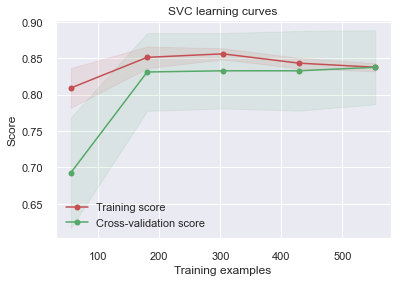

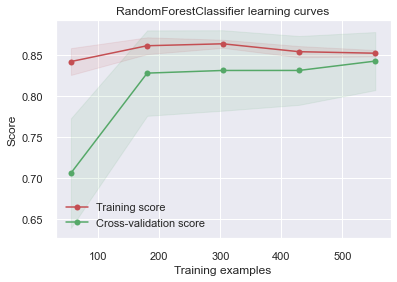

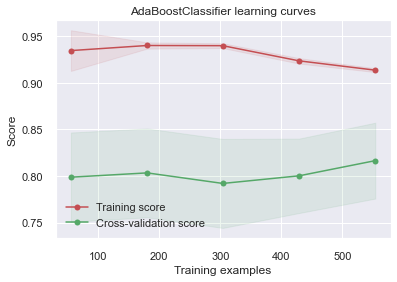

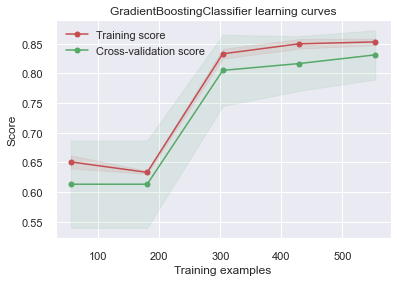

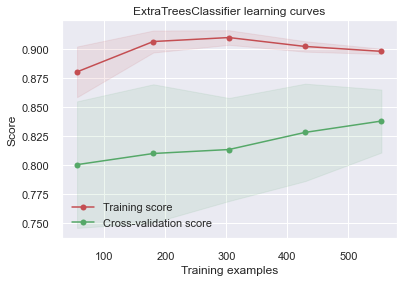

In [118]:
lc_models = [svm_search, rf_search, ada_search, gbr_search, etc_search]

for model in lc_models:
    name = model.estimator.__class__.__name__
    plot_learning_curve(model.best_estimator_, name+' learning curves', X_tr, y_tr, cv=kfold)
    plt.grid()

## 7 Confusion Matrix for the Best Model

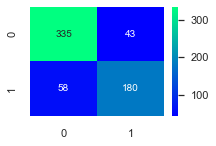

In [119]:
svm = SVC(C=0.6, gamma=0.1, kernel='rbf', random_state=42)
pred = cross_val_predict(svm, X_tr, y_tr, cv=10)
sns.heatmap(confusion_matrix(y_tr, pred), cmap='winter', annot=True, fmt='2.0f')
fig = plt.gcf()
fig.set_size_inches(3,2,5)
plt.show()

## 8. Feature Importance

In order to see the most informative features for the prediction of passengers survival, displayed the feature importance for each classifier

- model.feature_importances_ : 해당 모델 사용 시 각 변수별 중요도 값 ex) 0.12
- X.columns : 전체 컬럼명

- sharex : 모든 서브플롯이 같은 x축 눈금을 사용하도록 xlim을 조정하면 모든 서브플롯에 조정

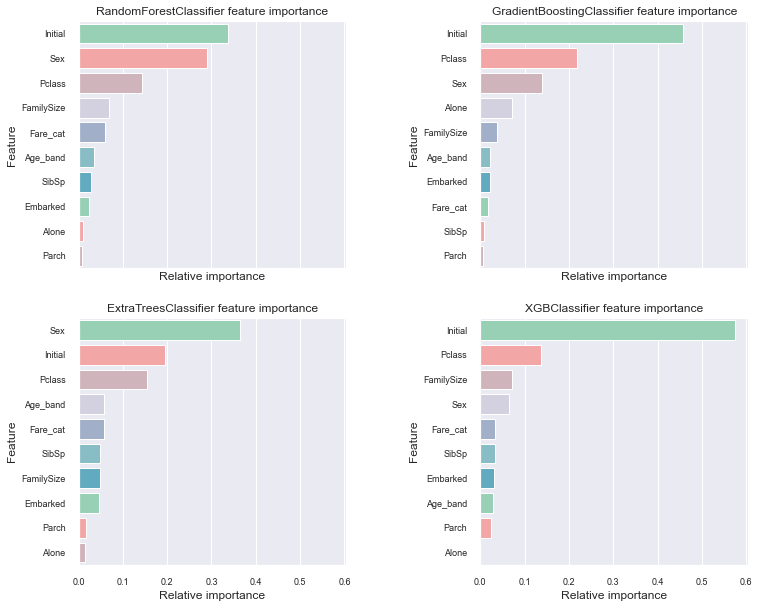

In [120]:
models = [rf_best, gbr_best, etc_best, xgb]
nrow = 0
ncol = 0

f, ax = plt.subplots(2, 2, sharex='all', figsize=(12, 10))

for model in models:
    name = model.__class__.__name__
    p = pd.Series(model.feature_importances_, X_tr.columns).sort_values(ascending=False)
    g = sns.barplot(p.values, p.index, orient='h', palette=colors, ax=ax[nrow][ncol])
    g.set_xlabel('Relative importance')
    g.set_ylabel('Feature')
    g.tick_params(labelsize=9)
    g.set_title(name + ' feature importance')
    if ncol < 1:
        ncol += 1
    else:
        ncol = 0
        nrow +=1

plt.subplots_adjust(wspace=0.5)
plt.show()

In [121]:
pd.Series(model.feature_importances_, X_tr.columns)

Pclass        0.137789
Sex           0.063682
SibSp         0.032785
Parch         0.024496
Embarked      0.031683
Initial       0.575758
Age_band      0.028752
FamilySize    0.071988
Alone         0.000000
Fare_cat      0.033067
dtype: float32

## 9. Final Ensemble with test data

The 5 classifiers give more or less the same prediction but there is some differences. Theses differences between the 5 classifier predictions are sufficient to consider an ensembling vote.

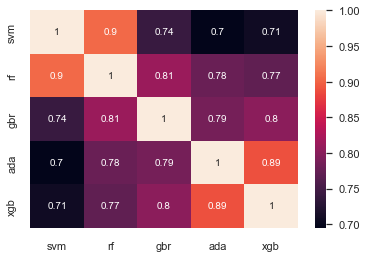

In [130]:
test_svm = pd.Series(svm_best.predict(test), name='svm')
test_rf = pd.Series(rf_best.predict(test), name='rf')
test_gbr = pd.Series(gbr_best.predict(test), name='gbr')
test_ada = pd.Series(ada_best.predict(test), name='ada')
test_xgb = pd.Series(xgb.predict(test), name='xgb')

ensemble_results = pd.concat([test_svm, test_rf, test_gbr, test_ada, test_xgb], axis=1)

g = sns.heatmap(ensemble_results.corr(), annot=True)

### 9.1 Combining models

- Pass the argument "soft" to the voting parameter to take into account the probability of each vote

In [125]:
votingC = VotingClassifier(estimators=[('svm', svm_best), ('rf', rf_best), ('gbr', gbr_best), ('xgb', xgb)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_tr, y_tr)

### 9.2 Prediction

In [126]:
test_survived = pd.Series(votingC.predict(test), name='Survived')
test_survived.head()

0    0
1    1
2    0
3    0
4    0
Name: Survived, dtype: int64

In [132]:
rst = pd.concat([IDtest, test_survived], axis=1)
rst.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [137]:
rst.to_csv('ensemble_python_voting.csv', index=False)

In [138]:
check = pd.read_csv('ensemble_python_voting.csv')
check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
